#Step 1: Initial DataFrame

In [1]:
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import  MinMaxScaler
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
np.random.seed(123)
df = pd.DataFrame(np.random.rand(1000, 2),
                  columns=['Impact', 'Probability'])
df

,Impact,Probability
0,0.696469,0.286139
1,0.226851,0.551315
2,0.719469,0.423106
3,0.980764,0.684830
4,0.480932,0.392118
...,...,...
995,0.715579,0.792169
996,0.826280,0.770030
997,0.690428,0.193012
998,0.731650,0.274711


#Step 2: Assessment Column

In [3]:
df['Assessment'] = df['Impact'] * df['Probability']
df

,Impact,Probability,Assessment
0,0.696469,0.286139,0.199287
1,0.226851,0.551315,0.125067
2,0.719469,0.423106,0.304412
3,0.980764,0.684830,0.671656
4,0.480932,0.392118,0.188582
...,...,...,...
995,0.715579,0.792169,0.566859
996,0.826280,0.770030,0.636260
997,0.690428,0.193012,0.133261
998,0.731650,0.274711,0.200993


#Step 3: Label Column

In [4]:
Label = []

for row in df['Assessment']:
  if row<= 0.33:
    Label.append("Low")
  elif row <= 0.66:
    Label.append('Med')
  else:
    Label.append('High')

df['Label'] = Label

df

,Impact,Probability,Assessment,Label
0,0.696469,0.286139,0.199287,Low
1,0.226851,0.551315,0.125067,Low
2,0.719469,0.423106,0.304412,Low
3,0.980764,0.684830,0.671656,High
4,0.480932,0.392118,0.188582,Low
...,...,...,...,...
995,0.715579,0.792169,0.566859,Med
996,0.826280,0.770030,0.636260,Med
997,0.690428,0.193012,0.133261,Low
998,0.731650,0.274711,0.200993,Low


#Step 4: One-Hot encoding

In [5]:
df = pd.get_dummies(df, columns = ['Label'])
df

,Impact,Probability,Assessment,Label_High,Label_Low,Label_Med
0,0.696469,0.286139,0.199287,0,1,0
1,0.226851,0.551315,0.125067,0,1,0
2,0.719469,0.423106,0.304412,0,1,0
3,0.980764,0.684830,0.671656,1,0,0
4,0.480932,0.392118,0.188582,0,1,0
...,...,...,...,...,...,...
995,0.715579,0.792169,0.566859,0,0,1
996,0.826280,0.770030,0.636260,0,0,1
997,0.690428,0.193012,0.133261,0,1,0
998,0.731650,0.274711,0.200993,0,1,0


#Step 5: Drop the Assessment Column

In [6]:
df = df.drop(['Assessment'], axis=1)
df

,Impact,Probability,Label_High,Label_Low,Label_Med
0,0.696469,0.286139,0,1,0
1,0.226851,0.551315,0,1,0
2,0.719469,0.423106,0,1,0
3,0.980764,0.684830,1,0,0
4,0.480932,0.392118,0,1,0
...,...,...,...,...,...
995,0.715579,0.792169,0,0,1
996,0.826280,0.770030,0,0,1
997,0.690428,0.193012,0,1,0
998,0.731650,0.274711,0,1,0


#Step 6: Dataset Preprocessing

In [7]:
x_data = df[["Impact", 'Probability']]
y_data = df[['Label_High', 'Label_Med', 'Label_Low']]


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)
x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [8]:
x_train.shape

(700, 2)

In [9]:
x_test.shape

(300, 2)

In [10]:
y_train.shape

(700, 3)

In [11]:
y_test.shape

(300, 3)

In [12]:
Scaler = MinMaxScaler()
x_train = Scaler.fit_transform(x_train)
x_test = Scaler.transform(x_test)

#Step 7: SoftMax in PyTorch

========Summary of Model Training========
Epoch:    0 / 10000 Cost: 1.09861 Training ACC: 6.57%
Epoch: 1000 / 10000 Cost: 0.84818 Training ACC: 71.00%
Epoch: 2000 / 10000 Cost: 0.84473 Training ACC: 71.00%
Epoch: 3000 / 10000 Cost: 0.84361 Training ACC: 71.00%
Epoch: 4000 / 10000 Cost: 0.84306 Training ACC: 71.00%
Epoch: 5000 / 10000 Cost: 0.84273 Training ACC: 71.00%
Epoch: 6000 / 10000 Cost: 0.84251 Training ACC: 71.00%
Epoch: 7000 / 10000 Cost: 0.84235 Training ACC: 71.00%
Epoch: 8000 / 10000 Cost: 0.84224 Training ACC: 71.00%
Epoch: 9000 / 10000 Cost: 0.84215 Training ACC: 71.00%
Epoch: 10000 / 10000 Cost: 0.84208 Training ACC: 71.00%


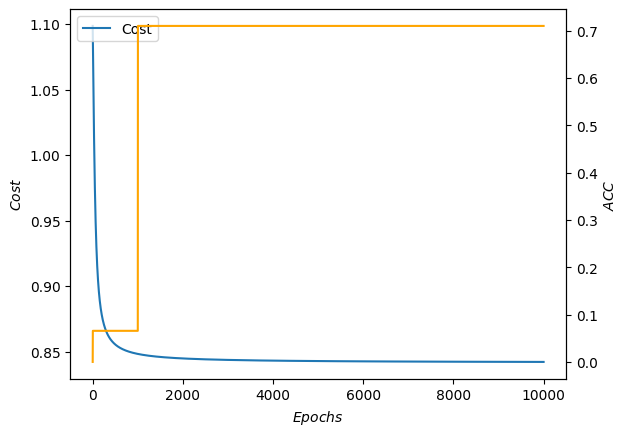

In [13]:
x_train, x_test = torch.FloatTensor(x_train), torch.FloatTensor(x_test)
y_train, y_test = torch.FloatTensor(y_train.to_numpy()), torch.FloatTensor(y_test.to_numpy())

W = torch.zeros((2, 3), requires_grad=True)
b = torch.zeros(3, requires_grad=True)

optimizer = optim.SGD([W,b], lr=0.1)

x_axis = []
y1_axis = []
y2_axis = []
accuracy = 0

print("========Summary of Model Training========")

for epoch in range(10001):
  x = x_train
  y = y_train

  hypothesis = F.softmax(x.matmul(W) + b, dim=1)
  cost = F.cross_entropy(hypothesis, y)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  x_axis.append(epoch)
  y1_axis.append(cost.item())
  y2_axis.append(accuracy)

  if epoch % 1000 == 0:
    pred = hypothesis
    correct_pred = torch.argmax(pred, 1) == torch.argmax(y_train, 1)
    accuracy = correct_pred.float().mean()
    print("Epoch: {:4d} / {} Cost: {:.5f} Training ACC: {:.2f}%".format(epoch, 10000, cost.item(), accuracy*100))

fig, x1 = plt.subplots()
x1.set_xlabel('$Epochs$')
x1.set_ylabel('$Cost$')
x1.plot(x_axis, y1_axis, label='Cost')
x1.legend(loc='upper left')

x2 = x1.twinx()
x2.set_ylabel('$ACC$')
x2.plot(x_axis, y2_axis, color='orange', label = 'ACC')
x1.legend(loc='upper left')

plt.show()

#Step 8: Model Testing

In [14]:
with torch.no_grad():
  pred = F.softmax(x_test.matmul(W) + b, dim=1)
  correct_prediction = torch.torch.argmax(pred, axis=1) == y_test.argmax(axis=1)
  accuracy = correct_prediction.float().mean()
  print("Testing Accuracy {:.2f}".format(accuracy.item()*100))

Testing Accuracy 67.67


#Step 9: Improvement

Using the StandardScaler instead of MinMaxScaler improves the testing and training accuracy

========Summary of Model Training========
Epoch:    0 / 10000 Cost: 1.09861 Training ACC: 6.29%
Epoch: 1000 / 10000 Cost: 0.82696 Training ACC: 83.57%
Epoch: 2000 / 10000 Cost: 0.77430 Training ACC: 85.86%
Epoch: 3000 / 10000 Cost: 0.75024 Training ACC: 88.29%
Epoch: 4000 / 10000 Cost: 0.73513 Training ACC: 89.29%
Epoch: 5000 / 10000 Cost: 0.72471 Training ACC: 89.43%
Epoch: 6000 / 10000 Cost: 0.71714 Training ACC: 88.71%
Epoch: 7000 / 10000 Cost: 0.71139 Training ACC: 89.00%
Epoch: 8000 / 10000 Cost: 0.70688 Training ACC: 88.71%
Epoch: 9000 / 10000 Cost: 0.70323 Training ACC: 88.71%
Epoch: 10000 / 10000 Cost: 0.70022 Training ACC: 88.71%


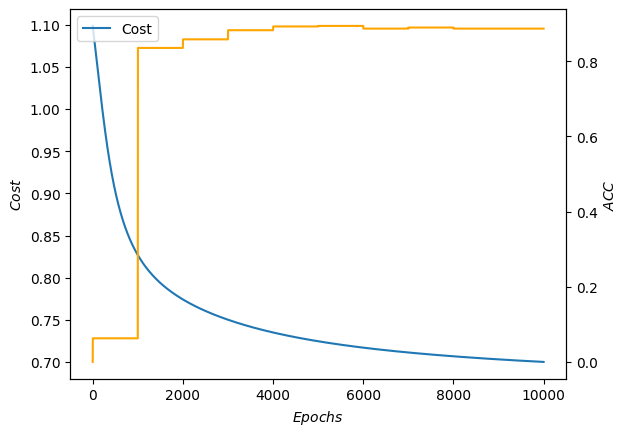

Testing Accuracy 87.67


In [16]:
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)
x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

Scaler = StandardScaler()
x_train = Scaler.fit_transform(x_train)
x_test = Scaler.transform(x_test)

x_train, x_test = torch.FloatTensor(x_train), torch.FloatTensor(x_test)
y_train, y_test = torch.FloatTensor(y_train.to_numpy()), torch.FloatTensor(y_test.to_numpy())

W = torch.zeros((2, 3), requires_grad=True)
b = torch.zeros(3, requires_grad=True)

optimizer = optim.SGD([W,b], lr=0.01)

x_axis = []
y1_axis = []
y2_axis = []
accuracy = 0

print("========Summary of Model Training========")

for epoch in range(10001):
  x = x_train
  y = y_train

  hypothesis = F.softmax(x.matmul(W) + b, dim=1)
  cost = F.cross_entropy(hypothesis, y)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  x_axis.append(epoch)
  y1_axis.append(cost.item())
  y2_axis.append(accuracy)

  if epoch % 1000 == 0:
    pred = hypothesis
    correct_pred = torch.argmax(pred, 1) == torch.argmax(y_train, 1)
    accuracy = correct_pred.float().mean()
    print("Epoch: {:4d} / {} Cost: {:.5f} Training ACC: {:.2f}%".format(epoch, 10000, cost.item(), accuracy*100))

fig, x1 = plt.subplots()
x1.set_xlabel('$Epochs$')
x1.set_ylabel('$Cost$')
x1.plot(x_axis, y1_axis, label='Cost')
x1.legend(loc='upper left')

x2 = x1.twinx()
x2.set_ylabel('$ACC$')
x2.plot(x_axis, y2_axis, color='orange', label = 'ACC')
x1.legend(loc='upper left')

plt.show()

with torch.no_grad():
  pred = F.softmax(x_test.matmul(W) + b, dim=1)
  correct_prediction = torch.torch.argmax(pred, axis=1) == y_test.argmax(axis=1)
  accuracy = correct_prediction.float().mean()
  print("Testing Accuracy {:.2f}".format(accuracy.item()*100))